### Dataset Information from kaggle
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

* Content
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

### **数据集说明”**

*   **来源：** 台湾一家银行在2005年的真实客户数据。
*   **用途：** 用于研究和预测信用卡客户在下个月是否会违约。
*   **规模：** 30,000个客户（数据行），每个客户有24个特征（数据列）。

### **每个特征（列）的详细解释**

我们将这些特征分成几类来理解：

#### **1. 客户基本信息 (Who they are)**

*   `LIMIT_BAL` (信用额度):
    *   **含义：** 银行给了这个客户多少钱的信用卡额度（单位：新台币）。
    *   **解读：** 这个数字通常反映了客户的**收入水平、信用历史和财富状况**。高额度通常意味着银行认为他是一个“优质客户”。这是我们判断“高收入/高净值”的主要依据。

*   `SEX` (性别):
    *   **含义：** 1 = 男性, 2 = 女性。
    *   **解读：** 一个基础的人口统计学特征。

*   `EDUCATION` (教育程度):
    *   **含义：** 1 = 研究生, 2 = 大学, 3 = 高中, 4 = 其他, 5/6/0 = 未知。
    *   **解读：** 另一个重要的人口统计学特征，可能与收入和消费习惯相关。

*   `MARRIAGE` (婚姻状况):
    *   **含义：** 1 = 已婚, 2 = 单身, 3 = 其他, 0 = 未知。
    *   **解读：** 通常已婚人士的财务状况和消费行为会更稳定。

*   `AGE` (年龄):
    *   **含义：** 客户的年龄（岁）。
    *   **解读：** 年轻客户可能消费更冲动、收入不稳定；年长客户则相反。

#### **2. 客户近半年的“还款史” (How they behaved)**

这是整个数据集中**最重要**的部分，是预测违约的核心！数据记录了从2005年9月到4月，总共6个月的行为。

*   `PAY_1` (9月的还款状态), `PAY_2` (8月的还款状态), ..., `PAY_6` (4月的还款状态):
    *   **含义：** 这是客户**上个月**的还款情况。数字的含义非常关键：
        *   `-2`: 账户未使用，没有消费。
        *   `-1`: **按时全额还款** (Pay duly)。这是**最好的**信用记录。
        *   `0`: 使用了**循环信用** (Revolving credit)。意味着客户还了最低还款额，但没有全额还清，剩余的欠款会计入下个月并产生利息。这是**中性**的信号。
        *   `1`: 延迟还款 **1个月**。
        *   `2`: 延迟还款 **2个月**。
        *   ...
        *   `8`: 延迟还款 **8个月**。
    *   **解读：** 这一系列的数字构成了一个客户的**信用DNA**。一个客户如果 `PAY_*` 的值大部分是-1或0，他就是个好客户。如果出现了1, 2, 3...，就说明他开始出现财务问题了，是**极强的风险信号**。

#### **3. 客户近半年的“账单与支付” (The numbers)**

这一部分提供了还款历史的具体金额。

*   `BILL_AMT1` (9月的账单金额), ..., `BILL_AMT6` (4月的账单金额):
    *   **含义：** 客户每个月收到的账单上写的应还金额。
    *   **解读：** 反映了客户的消费水平和信贷使用强度。

*   `PAY_AMT1` (9月的支付金额), ..., `PAY_AMT6` (4月的支付金额):
    *   **含义：** 客户每个月实际支付了多少钱。
    *   **解读：** 这是与`BILL_AMT`和`PAY_*`对照来看的关键数据。
        *   如果 `PAY_AMT1` >= `BILL_AMT1`，那么 `PAY_1` 应该就是 -1 (按时付清)。
        *   如果 `PAY_AMT1` < `BILL_AMT1` 但大于最低还款额，`PAY_1` 应该就是 0 (循环信用)。
        *   如果 `PAY_AMT1` 是 0 或者非常小，`PAY_1` 应该就是 1 或更高 (延迟还款)。

#### **4. 我们的预测目标 (The final outcome)**

*   `default.payment.next.month` (我们重命名为了 `default`):
    *   **含义：** 这是我们想预测的**标签**。它记录了这个客户在**下一个月（10月）**是否发生了违约。
    *   `1` = 是 (违约了)
    *   `0` = 否 (没有违约)
    *   **解读：** 这是我们所有工作的“答案”。我们用前6个月的行为数据（`PAY_1`到`PAY_6`等）作为“问题”，来预测这个“答案”。

---

### **为什么理解数据集如此重要？**

现在，让我们回头看看我们做过的工作，你就会发现它们是如何与这些特征含义紧密相连的：

1.  **在第二阶段，我们为什么选择 `LIMIT_BAL` 来定义“高收入”？**
    *   因为`LIMIT_BAL`（信用额度）是这个数据集中最能间接反映客户财富和银行信任度的指标。

2.  **在第三阶段，我们的生成器为什么修改 `AGE`, `LIMIT_BAL`, `PAY_AMT1`？**
    *   因为我们直觉上认为这些是影响客户画像的关键因素。比如，一个客户的年龄增长、收入（额度）变化、支付能力变化，会直接改变银行对他的看法。

3.  **我们下一步为什么要把 `PAY_1` 加入修改列表？**
    *   因为我们现在知道了，`PAY_1` 是最直接的信用行为信号。让一个客户的`PAY_1`从0（正常）变成1（延迟），在模型的“世界观”里，这应该是一个巨大的风险跳变。我们想看看，在潜在空间中，这个操作是否真的能把客户的坐标点**大幅度地**推向“高风险区域”。

**总而言之，对数据集每个字段含义的深刻理解，是我们设计实验、解读结果、提出假设的基石。** 你现在已经完全掌握了这份“病历”的解读方法，这将让你在后续的研究中，能更深刻地理解你的模型行为，并做出更有洞察力的分析。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub
import os

# 1. 使用 kagglehub 下载数据集到缓存，并获取路径
print("正在下载或从缓存定位数据集...")
dataset_dir = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")
dataset = os.path.join(dataset_dir, "UCI_Credit_Card.csv")

df = pd.read_csv(dataset)
print(df)

正在下载或从缓存定位数据集...
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL

In [11]:

# 1。加载数据
df = pd.read_csv(dataset)
# 2. 数据初步检查与清洗
print("----原始数据信息----")

# ID通常对建模没有帮助，删除ID列
df = df.drop("ID",axis = 1)


# 列名可能不友好，我们来重命名一下
# 特别是最后一个目标变量 'default.payment.next.month'
df = df.rename(columns={'default.payment.next.month': 'default', 
                        'PAY_0': 'PAY_1'}) # PAY_0 和 PAY_1 含义相似，统一一下命名习惯

# 让我们看看数据的前5行，确认修改生效
print("\n--- 清洗并重命名后的数据预览 ---")
print(df.head())

----原始数据信息----

--- 清洗并重命名后的数据预览 ---
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6

# 如何解读 .describe() 的输出:
count: 样本数量，这里是30000个客户。

mean: 平均值。例如，客户的平均年龄（AGE）是35.48岁。

std: 标准差，衡量数据的离散程度。

min, 25%, 50%, 75%, max: 分位数。

min: 最小值。例如，最小的信用额度（LIMIT_BAL）是10000。

50% (中位数): 一半客户的年龄低于34岁。

75%: 75%的客户信用额度低于240000。这说明高额度客户是少数。

观察异常值:
看看PAY_1 到 PAY_6 的 min 值是-2。根据数据文档，-2代表账户未使用，-1代表按时全额还款，0代表循环信用，1代表延迟1个月，等等。这个特征需要特别理解。
EDUCATION 列有0, 5, 6这些值，但在文档中只定义了1-4。这些可能需要被当作“其他”类别处理。这是数据清洗中常见的发现。

In [12]:
# 3. 描述性统计
print("\n--- 数值特征的描述性统计 ---")
print(df.describe().T) # .T 是转置，让表格看起来更舒服


--- 数值特征的描述性统计 ---
             count           mean            std       min       25%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.76

# 步骤三：数据可视化 (Data Visualization)

## 3.1 目标变量分布 (Target Variable Distribution)
我们的核心任务是预测违约，所以先看看违约和不违约的客户比例。

/tmp/ipykernel_2089159/3134498545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='default', data=df, palette='pastel')


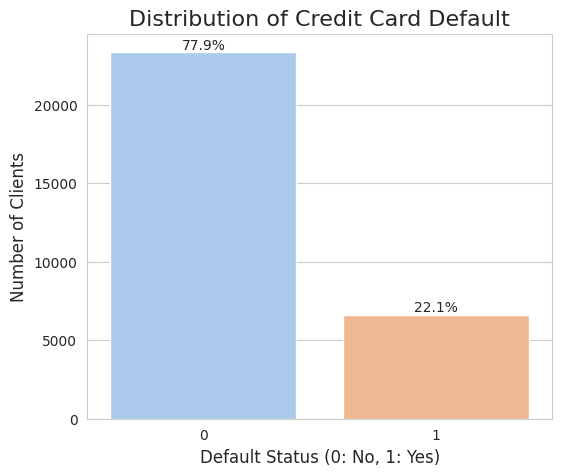

In [13]:
# 4. 可视化
# 设置画图风格
sns.set_style("whitegrid")

# 4.1 目标变量'default'的分布
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='default', data=df, palette='pastel')
plt.title('Distribution of Credit Card Default', fontsize=16)
plt.xlabel('Default Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# 在柱状图上显示百分比
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

这是一个典型的不平衡数据集。大约77.9%的客户没有违约，只有22.1%的客户违约了。
重要性: 这直接影响我们未来的模型评估。如果我们建立一个模型，把所有客户都预测为“不违约”，准确率也能达到77.9%！所以，我们未来不能只看准确率，而要更关注 Recall 和 AUC。

## 3.2 关键特征与违约关系的可视化
我们挑几个我们认为重要的特征（如信用额度、性别、教育程度、年龄），看看它们与是否违约有什么关系。

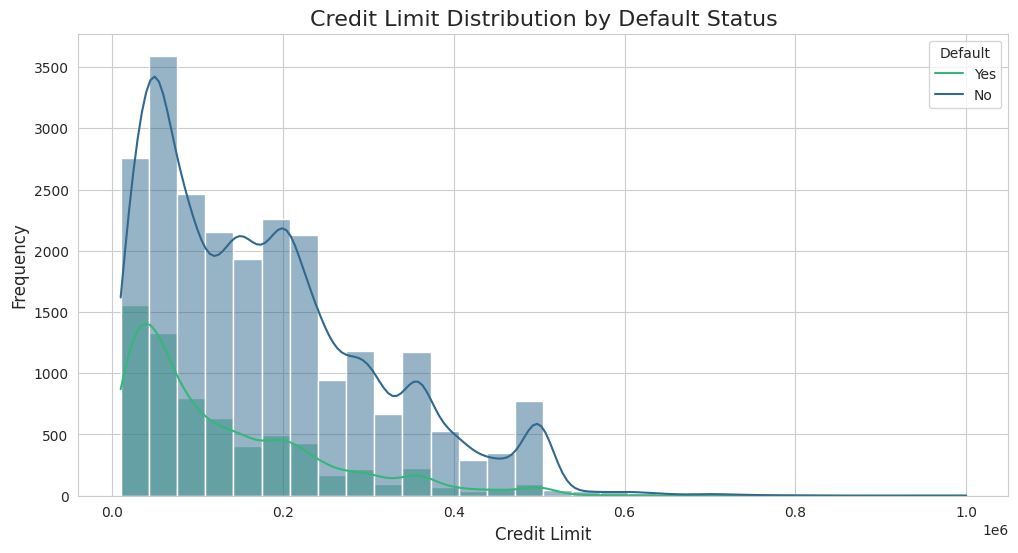

In [14]:
# 4.2 信用额度 (LIMIT_BAL) 与违约的关系
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='LIMIT_BAL', hue='default', bins=30, kde=True, palette='viridis')
plt.title('Credit Limit Distribution by Default Status', fontsize=16)
plt.xlabel('Credit Limit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Default', labels=['Yes', 'No'])

从图中可以读出:
信用额度较低的客户（尤其是10万以下）中，违约（橙色）的比例非常高。
随着信用额度的增加，违约客户的数量急剧减少。
这验证了一个常识：信用额度是预测违约的一个强特征。

/tmp/ipykernel_2089159/1307887053.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Male', 'Female'])
/tmp/ipykernel_2089159/1307887053.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Grad School', 'University', 'High School', 'Others', 'Unknown1', 'Unknown2', 'Unknown3']) # 根据数据字典
/tmp/ipykernel_2089159/1307887053.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Unknown', 'Married', 'Single', 'Others'])


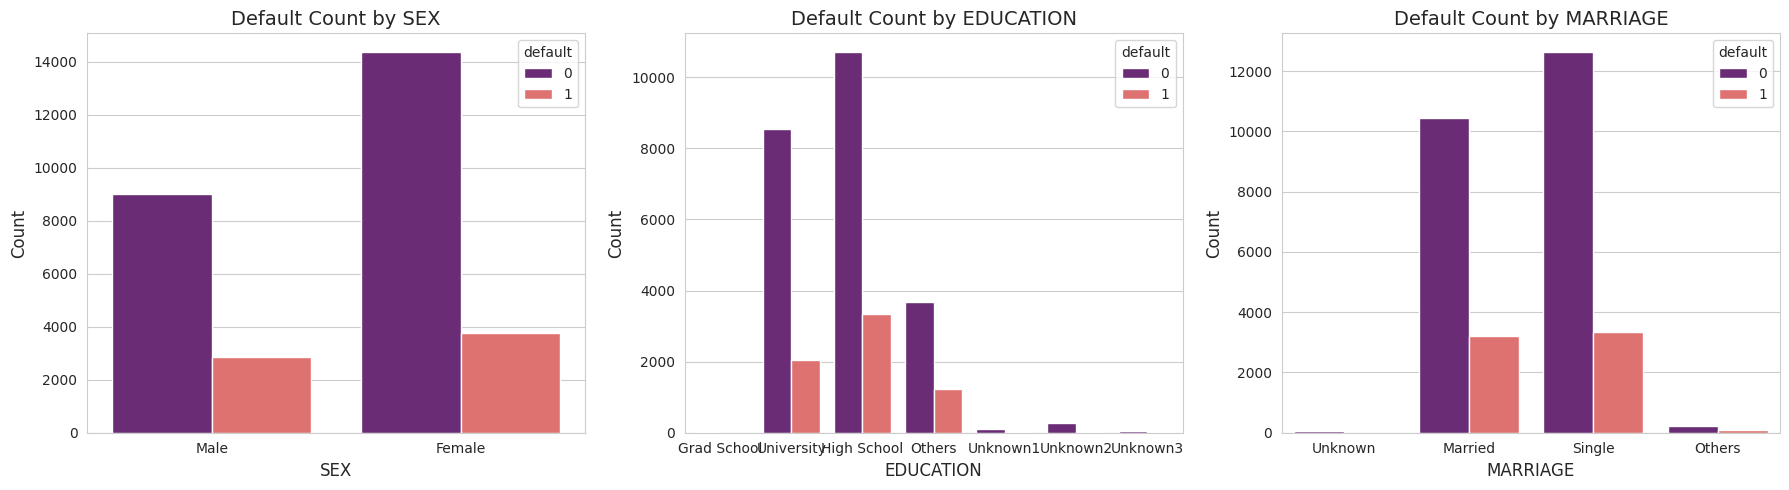

In [15]:
# 4.3 性别、教育程度、婚姻状况与违约的关系 (类别特征)
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='default', data=df, ax=axes[i], palette='magma')
    axes[i].set_title(f'Default Count by {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    # 替换数字为有意义的标签
    if feature == 'SEX':
        axes[i].set_xticklabels(['Male', 'Female'])
    elif feature == 'EDUCATION':
        axes[i].set_xticklabels(['Grad School', 'University', 'High School', 'Others', 'Unknown1', 'Unknown2', 'Unknown3']) # 根据数据字典
    elif feature == 'MARRIAGE':
        axes[i].set_xticklabels(['Unknown', 'Married', 'Single', 'Others'])

plt.tight_layout()
plt.show()

从图中可以读出:
性别(SEX): 虽然男性(1)和女性(2)的基数不同，但我们可以目测违约的比例在两个性别中似乎没有巨大差异。
教育程度(EDUCATION): 大学生(2)和研究生(1)是主要客户群体。从比例上看，学历较低的客户违约风险似乎稍高。
婚姻状况(MARRIAGE): 已婚(1)和单身(2)是主要群体。单身客户的违约比例看起来略高于已婚客户。

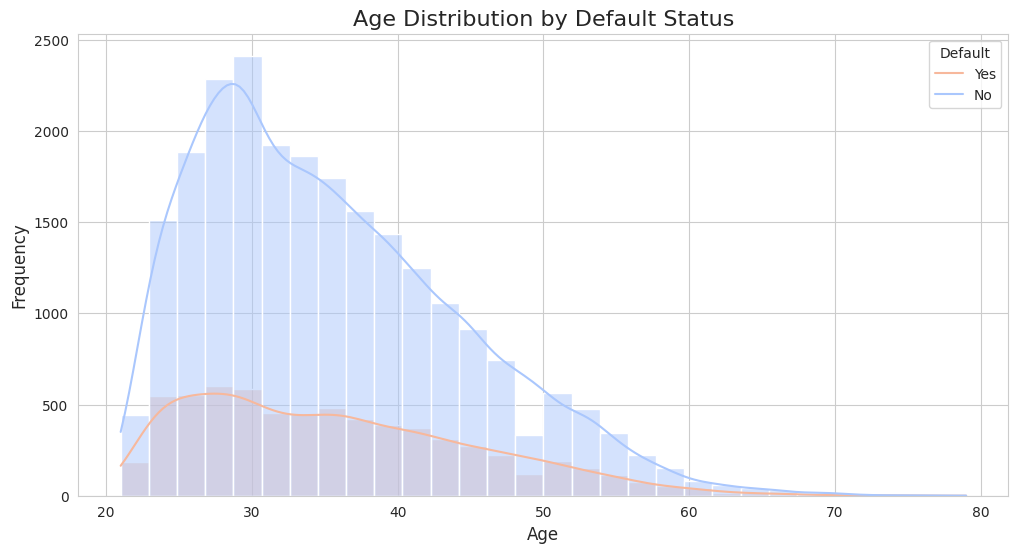

In [16]:
# 4.4 年龄 (AGE) 与违约的关系
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='AGE', hue='default', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution by Default Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Default', labels=['Yes', 'No'])
plt.show()

从图中可以读出:
客户主要集中在20-40岁之间。
在各个年龄段都有违约发生，但年轻客户群体（20-30岁）的违约人数最多。